In [115]:
#The graphs from this code is put up on my website @ https://sites.google.com/site/sohamdasgupta04
import matplotlib
import lmfit
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel, ExponentialModel, PowerLawModel
from numpy import linspace
plt.close('all')
from pprint import pprint
from datetime import timedelta, date

In [116]:
last_k = 10
df_india = pd.read_csv("data/daily_data_updated.csv")
state = 'RJ'

Transform India data : Since we iterate over dates, it is easier to have dates as rows instead of columns 


In [117]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 3, 10)
end_dt = date(2020, 4, 10)
analysis_dates = []
for dt in daterange(start_dt, end_dt):
    analysis_dates.append(dt.strftime("%Y-%m-%d"))

In [118]:
df_india_e = df_india[df_india.status == "Confirmed"]
ind_confirmed = df_india_e.reset_index()


In [119]:
df_india_transform_e = ind_confirmed[state]
ind_state = df_india_transform_e.reset_index()

In [120]:
df = pd.DataFrame()
df['Daily cases']=ind_state[state]
Ra1=df.rolling(3).mean()
Ra2=df.rolling(7).mean()
df['3 days moving average']=Ra1
df['7 days moving average']=Ra2


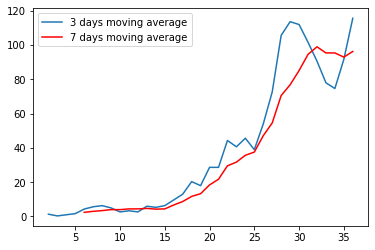

In [121]:
ax = plt.gca()
df.plot(y='3 days moving average', kind = 'line',ax=ax)
df.plot(y='7 days moving average', kind = 'line',color='red',ax=ax)        
plt.show()